In [1]:
import tensorflow as tf

In [5]:
import pandas as pd

In [7]:
df=pd.read_csv("diabetes.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
y=df["Outcome"]
x=df.drop(columns=["Outcome"])

In [3]:
from keras.models import Sequential
from keras.layers import Dense


In [122]:
model=Sequential()

In [123]:
#WE will have 3 layers
#When it is data we will go with dense layer
model.add(Dense(10,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
#model.add(Dense(4,activation='relu'))
#model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

## Compiling Keras

In [124]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [125]:
model.name

'sequential_12'

In [126]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_80 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.fit(x,y,epochs=150)

Epoch 1/150
768/768 [==============================] - 0s 220us/step - loss: 50.7015 - accuracy: 0.3490
Epoch 2/150
768/768 [==============================] - 0s 44us/step - loss: 37.1431 - accuracy: 0.3490
Epoch 3/150
768/768 [==============================] - 0s 46us/step - loss: 27.2746 - accuracy: 0.3490
Epoch 4/150
768/768 [==============================] - 0s 46us/step - loss: 19.4658 - accuracy: 0.3490
Epoch 5/150
768/768 [==============================] - 0s 48us/step - loss: 11.7469 - accuracy: 0.3581
Epoch 6/150
768/768 [==============================] - 0s 46us/step - loss: 4.4297 - accuracy: 0.4596
Epoch 7/150
768/768 [==============================] - 0s 46us/step - loss: 2.6139 - accuracy: 0.5820
Epoch 8/150
768/768 [==============================] - 0s 43us/step - loss: 2.3792 - accuracy: 0.5703
Epoch 9/150
768/768 [==============================] - 0s 44us/step - loss: 2.1678 - accuracy: 0.5859
Epoch 10/150
768/768 [==============================] - 0s 45us/step - loss:

In [128]:
_,accuracy=model.evaluate(x,y)

768/768 [==============================] - 0s 46us/step


In [129]:
print(accuracy)

0.7473958134651184


In [130]:
_

0.5118592989941438

In [136]:
prediction=model.predict_classes(x)

In [137]:
#WE will add this into data fram
df['prediction']=prediction

In [138]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [139]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [140]:
outcome=df.Outcome
predicted=df.prediction

In [141]:
confusion_matrix(outcome,predicted)

array([[444,  56],
       [138, 130]])

0.6989247311827957

In [144]:
#IT could able to find 48% of ppl who has diabbetes.
recall_score(outcome,predicted)

0.48507462686567165

In [147]:
#out of 57% of ppl who has diabetes the right ppl have diabetes are 69%- This is the precision.

precision_score(outcome,predicted)

0.6989247311827957

In [146]:
#Harmonic mean 
f1_score(outcome,predicted)

0.5726872246696036

In [148]:
#Lets create heatmap for confusion matrix
import seaborn as sns

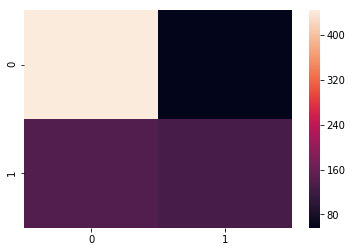

In [152]:
sns.heatmap(confusion_matrix(outcome,predicted),fmt=True,)

In [155]:
from sklearn.metrics import classification_report

In [157]:
print(classification_report(outcome,predicted))

             precision    recall  f1-score   support

          0       0.76      0.89      0.82       500
          1       0.70      0.49      0.57       268

avg / total       0.74      0.75      0.73       768

